In [21]:
chromedriver = r'E:\app\chrome_driver\chromedriver_win32\\chromedriver.exe'

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

import json
import os
import argparse

import requests
import urllib
import urllib3
from urllib3.exceptions import InsecureRequestWarning

import datetime
import time

urllib3.disable_warnings(InsecureRequestWarning)

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
#options.add_argument('--headless')
chromedriver = r'E:\app\chrome_driver\chromedriver_win32\\chromedriver.exe'
try:
    browser = webdriver.Chrome(chromedriver, options=options)
except Exception as e:
    print(f'No found chromedriver in this environment.')
    print(f'Install on your machine. exception: {e}')
    sys.exit()

browser.set_window_size(1280, 1024)

time.sleep(1)

C:\Users\GEORGE\AppData\Local\Temp/ipykernel_33008/1188131385.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(chromedriver, options=options)


In [6]:


def download_google_staticimages(browser,list_plant):
    for index,searchword1 in enumerate(list_plant,start=31):
     #   searchword1 = 'Aglaonema'
        searchurl = 'https://www.google.com/search?q=' + searchword1+'&source=lnms&tbm=isch'
        browser.get(searchurl)
        dirs = r'E:\jupyter\Bangkit\capstone project\img'
        dirs = os.path.join(dirs,str(index)+"_"+searchword1)
        maxcount = 1150



        if not os.path.exists(dirs):
            os.mkdir(dirs)


        print(f'Getting you a lot of images. This may take a few moments...')

        element = browser.find_element_by_tag_name('body')

        # Scroll down
        #for i in range(30):
        for i in range(50):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)

        try:
            browser.find_element_by_id('smb').click()
            for i in range(50):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)
        except:
            for i in range(10):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)

        print(f'Reached end of page.')
        time.sleep(0.5)
        print(f'Retry')
        time.sleep(0.5)

     

        browser.find_element_by_xpath('/html/body/div[3]/c-wiz/div[3]/div[1]/div/div/div/div[1]/div[2]/div[2]/input').click()

        # Scroll down 2
        for i in range(50):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)

        try:
            browser.find_element_by_id('smb').click()
            for i in range(50):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)
        except:
            for i in range(10):
                element.send_keys(Keys.PAGE_DOWN)
                time.sleep(0.3)

 
        page_source = browser.page_source 

        soup = BeautifulSoup(page_source, "html.parser")
        images = soup.find_all('img')

        urls = []
        for image in images:
            try:
                url = image['data-src']
                if not url.find('https://'):
                    urls.append(url)
            except:
                try:
                    url = image['src']
                    if not url.find('https://'):
                        urls.append(image['src'])
                except Exception as e:
                    print(f'No found image sources.')
                    print(e)

        count = 0
        if urls:
            for url in urls:
                try:
                    res = requests.get(url, verify=False, stream=True)
                    rawdata = res.raw.read()
                    with open(os.path.join(dirs, 'img_' + str(count) + '.jpg'), 'wb') as f:
                        f.write(rawdata)
                        count += 1
                        if count==maxcount:
                            break
                except Exception as e:
                    print('Failed to write rawdata.')
                    print(e)

      #  browser.close()
        print(f"{searchword1} gambar sebanyak:{len(os.listdir(dirs))}")
        
#         time.sleep(1)
#         search_text=browser.find_element_by_xpath("/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input")
#         search_text.clear()
#         time.sleep(0.5)
#         search_text.send_keys()
    
    

# Main block
def main():
    import warnings
    warnings.filterwarnings("ignore")
    t0 = time.time()
    list_item=["Coffea plant"]
    download_google_staticimages(browser,list_item)
    t1 = time.time()

    total_time = t1 - t0
    print(f'\n')
    print(f'Download completed. [Successful count = {len(list_item)}].')
    print(f'Total time is {str(total_time)} seconds.')
    print(f'Total time is {(total_time/60.0):.2f} minutes.')

if __name__ == '__main__':
    main()

Getting you a lot of images. This may take a few moments...
Reached end of page.
Retry
Coffea plant gambar sebanyak:743


Download completed. [Successful count = 1].
Total time is 179.07608032226562 seconds.
Total time is 2.98 minutes.


In [ ]:
list_item = ["Aglaonema","Chlorophytum comosum","Dracaena draco","Ficus elastica","Spathiphyllum","Sansevieria","Hyophorbe lagenicaulis",
        "Dypsis lutescens","Chrystanthemum","Epipremnum aureum","Calathea makoyana",
        "Philodendron","Zamioculcas","Aloe vera plant","Bromeliad","Monstera deliciosa",
        "Soleirolia soleirolii"]

In [62]:
"Orchidaceae" in list_item

False

In [ ]:
list_item=["Cacti","Microsorum musifolium","Gerbera Daisy","English Ivy","Orchidaceae","Jasminum",
          "Hibiscus rosa-sinensis","Bougainvillea","Nymphaea","Tulipa","Rosa plant","Iris  plant"]

In [46]:
list_item = ["Aglaonema","Chlorophytum comosum","Dracaena draco","Ficus elastica","Spathiphyllum","Sansevieria","Hyophorbe lagenicaulis",
            "Dypsis lutescens","Chrystanthemum","Epipremnum aureum","Calathea makoyana",
            "Philodendron","Zamioculcas","Aloe vera plant","Bromeliad","Monstera deliciosa",
            "Soleirolia soleirolii"]

In [65]:
list_item = ["Aglaonema","Chlorophytum comosum","Dracaena draco","Ficus elastica","Spathiphyllum","Sansevieria","Hyophorbe lagenicaulis",
            "Dypsis lutescens","Chrystanthemum","Epipremnum aureum","Calathea makoyana",
            "Philodendron","Zamioculcas","Aloe vera plant","Bromeliad","Monstera deliciosa",
            "Soleirolia soleirolii","Cacti","Microsorum musifolium","Gerbera Daisy","English Ivy","Orchidaceae","Jasminum",
          "Hibiscus rosa-sinensis","Bougainvillea","Nymphaea","Tulipa","Rosa plant","Iris  plant"]

In [67]:
import matplotlib.pyplot as plt

In [68]:
s=plt.imread(r"E:\jupyter\Bangkit\capstone project\img\1_Aglaonema\img_0.jpg")

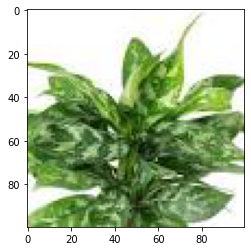

In [90]:
plt.imshow(s/255.0)